# 전처리 종합실습 ②

#### 목표
주가를 예측하는 모델링을 수행하고자 할때,  
모델링에 적합한 형태로 데이터를 만들어 봅시다.  
만든 데이터셋은 준비된 모델링 코드로 성능을 비교해 볼 것입니다.

## 데이터 준비

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
stock = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/KT.csv'
                 , sep=',', skipinitialspace=True)  
stock.Date = pd.to_datetime(stock.Date)
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-09,17.16,17.240000,17.070000,17.110001,15.917809,198700
1,2014-09-10,17.08,17.200001,16.959999,17.200001,16.001539,297900
2,2014-09-11,17.02,17.070000,16.959999,17.020000,15.834081,166500
3,2014-09-12,17.25,17.309999,17.219999,17.260000,16.057358,255000
4,2014-09-15,17.24,17.260000,17.139999,17.200001,16.001539,346200


## 문제 1. 데이터 살펴보기

1-1) 받은 데이터는 몇일부터 몇일까지의 주가 데이터인가요?

In [101]:
print(stock['Date'].min())
print(stock['Date'].max())

2014-09-09 00:00:00
2019-09-09 00:00:00


1-2) 기간 중 최고가와 최저가, 평균 주가는 얼마인가요?

In [102]:
stock['Close'].max()

18.6

In [103]:
stock['Close'].min()

10.97

In [104]:
stock['Close'].mean()

14.06943605718823

1-3) 연도별 최저, 최고, 평균 주가를 조회하시오.

In [105]:
stock_year = stock.copy()
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-09,17.16,17.240000,17.070000,17.110001,15.917809,198700
1,2014-09-10,17.08,17.200001,16.959999,17.200001,16.001539,297900
2,2014-09-11,17.02,17.070000,16.959999,17.020000,15.834081,166500
3,2014-09-12,17.25,17.309999,17.219999,17.260000,16.057358,255000
4,2014-09-15,17.24,17.260000,17.139999,17.200001,16.001539,346200


In [106]:
stock_year['year'] = stock_year['Date'].dt.year
stock_year['month'] = stock_year['Date'].dt.month
stock_year['day'] = stock_year['Date'].dt.day
stock_year.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,2014-09-09,17.16,17.240000,17.070000,17.110001,15.917809,198700,2014,9,9
1,2014-09-10,17.08,17.200001,16.959999,17.200001,16.001539,297900,2014,9,10
2,2014-09-11,17.02,17.070000,16.959999,17.020000,15.834081,166500,2014,9,11
3,2014-09-12,17.25,17.309999,17.219999,17.260000,16.057358,255000,2014,9,12
4,2014-09-15,17.24,17.260000,17.139999,17.200001,16.001539,346200,2014,9,15


In [107]:
stock_min = stock_year.groupby(by='year', as_index=False)[['Close']].min()
stock_max = stock_year.groupby(by='year', as_index=False)[['Close']].max()
stock_mean = stock_year.groupby(by='year', as_index=False)[['Close']].mean()
stock_min['Close_max'] = stock_max['Close']
stock_min['Close_mean'] = stock_mean['Close']
stock_min.rename(columns = {'Close':'Close_min'}, inplace=True)
stock_min

,year,Close_min,Close_max,Close_mean
0,2014,14.05,17.459999,15.293250
1,2015,11.83,14.850000,13.113095
2,2016,11.03,16.730000,14.140794
3,2017,13.84,18.600000,15.735578
4,2018,12.75,16.010000,13.973426
5,2019,10.97,14.670000,12.514566


1-4) 종가(Close)를 라인차트로 그려봅시다.

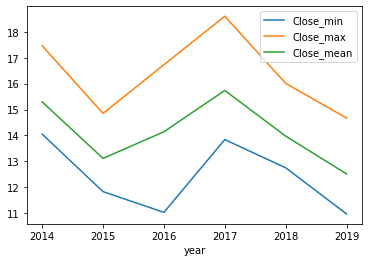

In [108]:
stock_min.plot(kind = 'line', x='year', y=['Close_min','Close_max','Close_mean'])
plt.show()

## 문제 2. 데이터 셋 구성하기1

종가를 기준으로 익일 종가를 예측하는 모델을 만들고자 합니다.
데이터프레임은 어떻게 구성되어야 할까요?

2-1) 전일 종가 변수를 추가하시오. 
* .shift()

In [109]:
stock_year['prev_Close'] = stock_year['Close'].shift(1)
stock_year.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,prev_Close
0,2014-09-09,17.16,17.240000,17.070000,17.110001,15.917809,198700,2014,9,9,NaN
1,2014-09-10,17.08,17.200001,16.959999,17.200001,16.001539,297900,2014,9,10,17.110001
2,2014-09-11,17.02,17.070000,16.959999,17.020000,15.834081,166500,2014,9,11,17.200001
3,2014-09-12,17.25,17.309999,17.219999,17.260000,16.057358,255000,2014,9,12,17.020000
4,2014-09-15,17.24,17.260000,17.139999,17.200001,16.001539,346200,2014,9,15,17.260000


2-2) 전전일 종가대비 전일 종가 등락폭 변수

In [110]:
stock_year['rate'] = stock_year['Close'].shift(1) - stock_year['Close'].shift(2)
stock_year.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,prev_Close,rate
0,2014-09-09,17.16,17.240000,17.070000,17.110001,15.917809,198700,2014,9,9,NaN,NaN
1,2014-09-10,17.08,17.200001,16.959999,17.200001,16.001539,297900,2014,9,10,17.110001,NaN
2,2014-09-11,17.02,17.070000,16.959999,17.020000,15.834081,166500,2014,9,11,17.200001,0.090000
3,2014-09-12,17.25,17.309999,17.219999,17.260000,16.057358,255000,2014,9,12,17.020000,-0.180001
4,2014-09-15,17.24,17.260000,17.139999,17.200001,16.001539,346200,2014,9,15,17.260000,0.240000


2-3) 전일 고가대비 저가 등락폭 변수

In [111]:
stock_year['HighLow'] = stock_year['High'].shift(1) - stock_year['Low'].shift(1)
stock_year.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,prev_Close,rate,HighLow
0,2014-09-09,17.16,17.240000,17.070000,17.110001,15.917809,198700,2014,9,9,NaN,NaN,NaN
1,2014-09-10,17.08,17.200001,16.959999,17.200001,16.001539,297900,2014,9,10,17.110001,NaN,0.170000
2,2014-09-11,17.02,17.070000,16.959999,17.020000,15.834081,166500,2014,9,11,17.200001,0.090000,0.240002
3,2014-09-12,17.25,17.309999,17.219999,17.260000,16.057358,255000,2014,9,12,17.020000,-0.180001,0.110001
4,2014-09-15,17.24,17.260000,17.139999,17.200001,16.001539,346200,2014,9,15,17.260000,0.240000,0.090000


2-4) 7일 이동평균종가 : 
* rolling().mean()
* .shift()

In [112]:
stock_year['lag7_close'] = stock_year['Close'].rolling(7, min_periods=1).mean().shift(1)
stock_year.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,prev_Close,rate,HighLow,lag7_close
0,2014-09-09,17.16,17.240000,17.070000,17.110001,15.917809,198700,2014,9,9,NaN,NaN,NaN,NaN
1,2014-09-10,17.08,17.200001,16.959999,17.200001,16.001539,297900,2014,9,10,17.110001,NaN,0.170000,17.110001
2,2014-09-11,17.02,17.070000,16.959999,17.020000,15.834081,166500,2014,9,11,17.200001,0.090000,0.240002,17.155001
3,2014-09-12,17.25,17.309999,17.219999,17.260000,16.057358,255000,2014,9,12,17.020000,-0.180001,0.110001,17.110001
4,2014-09-15,17.24,17.260000,17.139999,17.200001,16.001539,346200,2014,9,15,17.260000,0.240000,0.090000,17.147500


2-5) 요일 변수 : 
* 날짜형식칼럼.dt.dayofweek

In [114]:
stock_year['weekday'] = stock_year['Date'].dt.dayofweek
stock_year.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,prev_Close,rate,HighLow,lag7_close,weekday
0,2014-09-09,17.16,17.240000,17.070000,17.110001,15.917809,198700,2014,9,9,NaN,NaN,NaN,NaN,1
1,2014-09-10,17.08,17.200001,16.959999,17.200001,16.001539,297900,2014,9,10,17.110001,NaN,0.170000,17.110001,2
2,2014-09-11,17.02,17.070000,16.959999,17.020000,15.834081,166500,2014,9,11,17.200001,0.090000,0.240002,17.155001,3
3,2014-09-12,17.25,17.309999,17.219999,17.260000,16.057358,255000,2014,9,12,17.020000,-0.180001,0.110001,17.110001,4
4,2014-09-15,17.24,17.260000,17.139999,17.200001,16.001539,346200,2014,9,15,17.260000,0.240000,0.090000,17.147500,0


## 문제 3. 데이터 셋 구성하기2

위에서 만든 변수 이외에 추가로 5개 이상을 더 만드시오.

In [ ]:
#월초 월말 월별 등

## 문제 4. 모델링을 위한 전처리

* dummy variable로 변환하시오

In [118]:
# WeekDay dummy variable
weekDay_dummy = pd.get_dummies(stock_year['weekday'])
weekDay_dummy.columns = ['월','화','수','목','금']
weekDay_dummy.head()

,월,화,수,목,금
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,0,1
4,1,0,0,0,0


In [119]:
stock_year = pd.concat([stock_year, weekDay_dummy], axis=1, join='inner')
stock_year.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,prev_Close,rate,HighLow,lag7_close,weekday,월,화,수,목,금
0,2014-09-09,17.16,17.240000,17.070000,17.110001,15.917809,198700,2014,9,9,NaN,NaN,NaN,NaN,1,0,1,0,0,0
1,2014-09-10,17.08,17.200001,16.959999,17.200001,16.001539,297900,2014,9,10,17.110001,NaN,0.170000,17.110001,2,0,0,1,0,0
2,2014-09-11,17.02,17.070000,16.959999,17.020000,15.834081,166500,2014,9,11,17.200001,0.090000,0.240002,17.155001,3,0,0,0,1,0
3,2014-09-12,17.25,17.309999,17.219999,17.260000,16.057358,255000,2014,9,12,17.020000,-0.180001,0.110001,17.110001,4,0,0,0,0,1
4,2014-09-15,17.24,17.260000,17.139999,17.200001,16.001539,346200,2014,9,15,17.260000,0.240000,0.090000,17.147500,0,1,0,0,0,0


In [214]:
# 불필요한 변수들 제거
# fields_to_drop = ['Date','Open','High','Low','Volume','Year','Adj Close','WeekDay']
# stock = stock.drop(fields_to_drop, axis=1)
stock = stock_year[['Close','prev_Close','lag7_close','Open','금']]
stock.head()

,Close,prev_Close,lag7_close,Open,금
0,17.110001,NaN,NaN,17.16,0
1,17.200001,17.110001,17.110001,17.08,0
2,17.020000,17.200001,17.155001,17.02,0
3,17.260000,17.020000,17.110001,17.25,1
4,17.200001,17.260000,17.147500,17.24,0


In [215]:
# drop Na
stock.dropna(inplace = True)
stock.head()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Close,prev_Close,lag7_close,Open,금
1,17.200001,17.110001,17.110001,17.080000,0
2,17.020000,17.200001,17.155001,17.020000,0
3,17.260000,17.020000,17.110001,17.250000,1
4,17.200001,17.260000,17.147500,17.240000,0
5,17.139999,17.200001,17.158001,17.049999,0


**이하 코드는 이해가 안가면 일단 그냥 실행을 합시다**

In [216]:
# split

train_features = stock.iloc[:1200, 1: ]
test_features = stock.iloc[1200:, 1: ]

train_target = stock.iloc[:1200, :1 ]
test_target = stock.iloc[1200:, :1 ]

train_target, test_target = train_target.values, test_target.values

* Scaling

In [217]:
# 필요한 함수 로딩
from sklearn.preprocessing import MinMaxScaler

# 선언하기
minmax = MinMaxScaler()

# train 데이터로 .fit ==> 모든변수의 min, max, 공식 도출.
# 말하자면, scaling 하는 모델을 만드는 것!
minmax.fit(train_features) # train min, max

# 위 scaling 공식으로 적용하기(변환하기)
train_features_sc = minmax.transform(train_features)
test_features_sc = minmax.transform(test_features)

## 5. 모델링

아래 코드는 머신러닝 과정에서 배웁니다.  
무작정 실행하고 결과를 확인하는 용도로만 사용합시다.

Mean Absolute Percentage Error : 1.25496


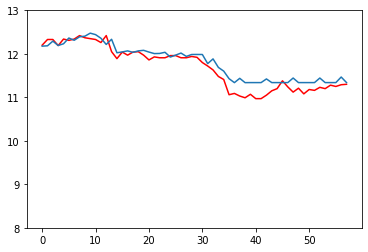

In [218]:
# Nearest-Neighbor Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 모델 준비
knn_reg = KNeighborsRegressor(n_neighbors=10)

# 모델 training
# Test셋의 첫번째 컬럼(cnt)만 사용할 것이다. 
knn_reg.fit(train_features , train_target  )

# Training & Validation set에서의 예측값 준비
test_pred = knn_reg.predict(test_features)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 성능 확인
print("Mean Absolute Percentage Error : {0:.5f}".format(mean_absolute_percentage_error(test_target, test_pred) ))

plt.plot(test_target, color = 'r')
plt.plot(test_pred)
plt.ylim(8,13)
plt.show()

성능을 더 높이기 위해서 무엇을 더 해볼 수 있을까요?  
어떤 변수를 더 추가하면 성능향상에 도움이 될까요?